In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
gb_cb_cv = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
gb_cb = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [8]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [9]:
cat = evaluate_model(cb, X, y)

In [11]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [12]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [13]:
g = evaluate_model(gb, X, y)

In [14]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [15]:
g

,gb_score
0,0.916466
1,0.832746
2,0.913140
3,0.900737
4,0.931130
5,0.911643
6,0.924417
7,0.907012
8,0.926922
9,0.838528


In [26]:
GB_CB_CV = evaluate_model(gb_cb_cv, X, y)

In [27]:
GB_CB_CV = GB_CB_CV[['test_score']].rename(columns={'test_score':'GB_CB_CV'})

In [28]:
GB_CB_CV

,GB_CB_CV
0,0.924488
1,0.896521
2,0.929380
3,0.920098
4,0.948507
5,0.927679
6,0.936054
7,0.922235
8,0.941486
9,0.878844


In [29]:
GB_CB = evaluate_model(gb_cb, X, y)

In [30]:
GB_CB = GB_CB[['test_score']].rename(columns={'test_score':'GB_CB'})

In [31]:
GB_CB

,GB_CB
0,0.920859
1,0.903301
2,0.931813
3,0.924353
4,0.948466
5,0.928996
6,0.939781
7,0.925835
8,0.941722
9,0.886379


In [32]:
combo = pd.concat([cat, g, GB_CB_CV, GB_CB], axis=1)

In [33]:
combo

,cat_score,gb_score,GB_CB_CV,GB_CB
0,0.926950,0.916466,0.924488,0.920859
1,0.898789,0.832746,0.896521,0.903301
2,0.936517,0.913140,0.929380,0.931813
3,0.929022,0.900737,0.920098,0.924353
4,0.950638,0.931130,0.948507,0.948466
5,0.936688,0.911643,0.927679,0.928996
6,0.942846,0.924417,0.936054,0.939781
7,0.926769,0.907012,0.922235,0.925835
8,0.945508,0.926922,0.941486,0.941722
9,0.884738,0.838528,0.878844,0.886379


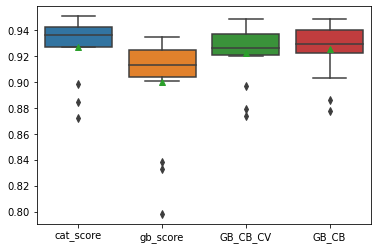

In [34]:
sns.boxplot(data=combo, showmeans=True);

In [35]:
combo.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB
count,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.922110,0.925184
std,0.023191,0.041473,0.022444,0.020922
min,0.872051,0.798137,0.873527,0.877874
25%,0.926860,0.903875,0.921167,0.922606
50%,0.936517,0.913265,0.925885,0.928996
75%,0.942064,0.924419,0.936741,0.939864
max,0.950638,0.934496,0.948507,0.948466


In [36]:
ordinald1 = pd.read_csv('OrdinalDrop1.csv')
ordinald1.shape

(2579, 83)

In [37]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [38]:
X1 = ordinald1.drop(['SalePrice'], axis=1)
y1 = ordinald1.SalePrice

In [39]:
catd1 = evaluate_model(cb, X1, y1)

In [40]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [41]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [43]:
gd1 = evaluate_model(gb, X1, y1)

In [44]:
gd1 = gd1[['test_score']].rename(columns={'test_score':'gbd1_score'})

In [45]:
gd1

,gbd1_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [55]:
GB_CB_CV_d1 = evaluate_model(gb_cb_cv, X1, y1)

In [56]:
GB_CB_CV_d1 = GB_CB_CV_d1[['test_score']].rename(columns={'test_score':'GB_CB_CV_d1'})

In [57]:
GB_CB_CV_d1

,GB_CB_CV_d1
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [58]:
GB_CB_d1 = evaluate_model(gb_cb, X1, y1)

In [59]:
GB_CB_d1 = GB_CB_d1[['test_score']].rename(columns={'test_score':'GB_CB_d1'})

In [60]:
GB_CB_d1

,GB_CB_d1
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [61]:
combo_d1 = pd.concat([cat, g, GB_CB_CV, GB_CB, catd1, gd1, GB_CB_CV_d1, GB_CB_d1], axis=1)

In [62]:
combo_d1

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
0,0.926950,0.916466,0.924488,0.920859,0.931308,0.908753,0.926286,0.923769
1,0.898789,0.832746,0.896521,0.903301,0.946897,0.939744,0.947589,0.948160
2,0.936517,0.913140,0.929380,0.931813,0.946280,0.936716,0.945496,0.943670
3,0.929022,0.900737,0.920098,0.924353,0.911824,0.895961,0.905740,0.906592
4,0.950638,0.931130,0.948507,0.948466,0.949900,0.937107,0.950007,0.949078
5,0.936688,0.911643,0.927679,0.928996,0.933133,0.915868,0.929574,0.928476
6,0.942846,0.924417,0.936054,0.939781,0.929582,0.923176,0.933765,0.933644
7,0.926769,0.907012,0.922235,0.925835,0.926053,0.919474,0.925759,0.925781
8,0.945508,0.926922,0.941486,0.941722,0.950737,0.941296,0.950280,0.950220
9,0.884738,0.838528,0.878844,0.886379,0.939564,0.921069,0.931964,0.934893


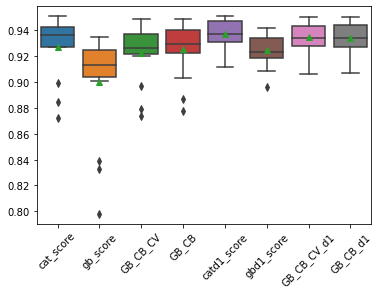

In [65]:
sns.boxplot(data=combo_d1, showmeans=True).tick_params(axis='x', labelrotation=45);

In [64]:
combo_d1.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.922110,0.925184,0.936878,0.924317,0.934417,0.933957
std,0.023191,0.041473,0.022444,0.020922,0.011131,0.012277,0.012178,0.012242
min,0.872051,0.798137,0.873527,0.877874,0.911824,0.895961,0.905740,0.906592
25%,0.926860,0.903875,0.921167,0.922606,0.930445,0.918784,0.927930,0.927128
50%,0.936517,0.913265,0.925885,0.928996,0.936986,0.923176,0.933977,0.933644
75%,0.942064,0.924419,0.936741,0.939864,0.946589,0.933732,0.943374,0.944266
max,0.950638,0.934496,0.948507,0.948466,0.950737,0.941296,0.950280,0.950220


In [66]:
ordinald2 = pd.read_csv('OrdinalDrop2.csv')
ordinald2.shape

(2578, 83)

In [67]:
ordinald2 = ordinald2.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald2.shape

(2578, 80)

In [68]:
X2 = ordinald2.drop(['SalePrice'], axis=1)
y2 = ordinald2.SalePrice

In [69]:
catd2 = evaluate_model(cb, X2, y2)

In [70]:
catd2 = catd2[['test_score']].rename(columns={'test_score':'catd2_score'})

In [71]:
catd2

,catd2_score
0,0.931945
1,0.938533
2,0.947346
3,0.918753
4,0.944991
5,0.934845
6,0.941550
7,0.933222
8,0.945822
9,0.942002


In [81]:
gd2 = evaluate_model(gb, X2, y2)

In [82]:
gd2 = gd2[['test_score']].rename(columns={'test_score':'gbd2_score'})

In [83]:
gd2

,gbd2_score
0,0.914243
1,0.923267
2,0.930881
3,0.897713
4,0.939440
5,0.912199
6,0.932387
7,0.922119
8,0.943442
9,0.916864


In [75]:
GB_CB_CV_d2 = evaluate_model(gb_cb_cv, X2, y2)

In [76]:
GB_CB_CV_d2 = GB_CB_CV_d2[['test_score']].rename(columns={'test_score':'GB_CB_CV_d2'})

In [77]:
GB_CB_CV_d2

,GB_CB_CV_d2
0,0.928059
1,0.940267
2,0.940669
3,0.916298
4,0.945595
5,0.925667
6,0.940447
7,0.931273
8,0.941838
9,0.937244


In [78]:
GB_CB_d2 = evaluate_model(gb_cb, X2, y2)

In [79]:
GB_CB_d2 = GB_CB_d2[['test_score']].rename(columns={'test_score':'GB_CB_d2'})

In [80]:
GB_CB_d2

,GB_CB_d2
0,0.931787
1,0.937868
2,0.946176
3,0.915209
4,0.947324
5,0.927594
6,0.942651
7,0.935038
8,0.942140
9,0.939463


In [84]:
combo_d2 = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2], axis=1)

In [85]:
combo_d2

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
0,0.926950,0.916466,0.924488,0.920859,0.931308,0.908753,0.926286,0.923769,0.931945,0.914243,0.928059,0.931787
1,0.898789,0.832746,0.896521,0.903301,0.946897,0.939744,0.947589,0.948160,0.938533,0.923267,0.940267,0.937868
2,0.936517,0.913140,0.929380,0.931813,0.946280,0.936716,0.945496,0.943670,0.947346,0.930881,0.940669,0.946176
3,0.929022,0.900737,0.920098,0.924353,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209
4,0.950638,0.931130,0.948507,0.948466,0.949900,0.937107,0.950007,0.949078,0.944991,0.939440,0.945595,0.947324
5,0.936688,0.911643,0.927679,0.928996,0.933133,0.915868,0.929574,0.928476,0.934845,0.912199,0.925667,0.927594
6,0.942846,0.924417,0.936054,0.939781,0.929582,0.923176,0.933765,0.933644,0.941550,0.932387,0.940447,0.942651
7,0.926769,0.907012,0.922235,0.925835,0.926053,0.919474,0.925759,0.925781,0.933222,0.922119,0.931273,0.935038
8,0.945508,0.926922,0.941486,0.941722,0.950737,0.941296,0.950280,0.950220,0.945822,0.943442,0.941838,0.942140
9,0.884738,0.838528,0.878844,0.886379,0.939564,0.921069,0.931964,0.934893,0.942002,0.916864,0.937244,0.939463


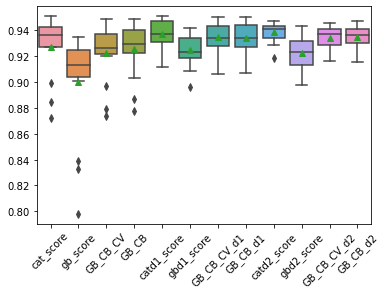

In [86]:
sns.boxplot(data=combo_d2, showmeans=True).tick_params(axis='x', labelrotation=45);

In [87]:
combo_d2.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.922110,0.925184,0.936878,0.924317,0.934417,0.933957,0.938227,0.922535,0.934212,0.934618
std,0.023191,0.041473,0.022444,0.020922,0.011131,0.012277,0.012178,0.012242,0.007841,0.013025,0.008465,0.009223
min,0.872051,0.798137,0.873527,0.877874,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209
25%,0.926860,0.903875,0.921167,0.922606,0.930445,0.918784,0.927930,0.927128,0.934034,0.913221,0.928448,0.929690
50%,0.936517,0.913265,0.925885,0.928996,0.936986,0.923176,0.933977,0.933644,0.941039,0.923267,0.937244,0.936096
75%,0.942064,0.924419,0.936741,0.939864,0.946589,0.933732,0.943374,0.944266,0.943497,0.931634,0.940558,0.940802
max,0.950638,0.934496,0.948507,0.948466,0.950737,0.941296,0.950280,0.950220,0.947346,0.943442,0.945595,0.947324


In [88]:
ordinalIF = pd.read_csv('OrdinalDropIF.csv')
ordinalIF.shape

(2579, 83)